In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Modeling: 1-Dimensional

Here we create some sythetic data using a linear formula:

$$z=2+1.5x+\epsilon$$
- $x$ is input
- $z$ is target
- 1.5 is the slope ($m_{actual}$)
- 2 is the z-axis intercept ($b_{actual}$)
- $\epsilon$ is noise from a random normal distribution

We begin by creating 1000 `x` values between 5 and 25, shaped as 1000 rows and 1 column.

In [53]:
np.random.seed(155)
x=20*np.random.random((10000,1))+5
x.shape,x.min(),x.max()

((10000, 1), 5.001039777079033, 24.996994086999795)

Next we create 1000 $\epsilon$ values with standard deviation of 3, shaped as 1000 rows and 1 column.

In [54]:
eps=2*np.random.randn(10000,1)
eps.shape,eps.mean(),eps.std()

((10000, 1), -0.009444930515622578, 1.9883902671939782)

With these two now we generate z values using the formula.

In [55]:
z=2+1.5*x+eps
z.shape

(10000, 1)

(0, 50)

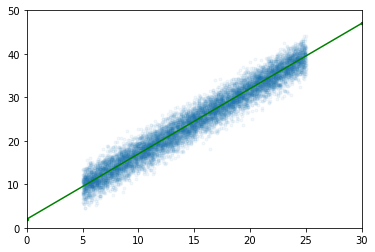

In [57]:
x_=np.array([0,30])
z_=1.5*x_+2 #generator function
plt.plot(x,z,'.',alpha=0.05)
plt.plot(x_,z_,'g.-',markersize=5)
plt.xlim(0,30)
plt.ylim(0,50)

To solve this using numpy we generate an array $X$ made from stacking a column of ones and the column `x`. This allows us represent b and m as elements of the array $\beta$.

$$z=2+1.5x$$
$$z=\beta\cdot X$$
- $X = [1,x]$
- $\beta = [b,m]=[2,1.5]$

In [58]:
X=np.hstack([np.ones((10000,1)), x])
X

array([[ 1.        , 18.04652652],
       [ 1.        , 23.4224593 ],
       [ 1.        ,  8.4629183 ],
       ...,
       [ 1.        ,  5.70828651],
       [ 1.        , 19.10769247],
       [ 1.        ,  5.15140812]])

To solve for the slope and intercept using a pre-built model we reach for 
the `LinearRegression` class in the `sklearn` library submodule `linear_model`.

In [73]:
from sklearn.linear_model import LinearRegression

In [63]:
beta=np.linalg.inv(X.T@X)@X.T@z
beta=beta.reshape(-1)
beta

array([2.0630887 , 1.49515298])

In [66]:
b=beta[0]
m=beta[1]
b,m

(2.06308870070335, 1.4951529808996145)

In [67]:
model = LinearRegression()
model.fit(x, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([[1.49515298]]),
 '_residues': array([39529.17241496]),
 'rank_': 1,
 'singular_': array([575.68662994]),
 'intercept_': array([2.0630887])}

In [70]:
model.coef_

array([[1.49515298]])

In [71]:
model.intercept_

array([2.0630887])

To use the model to predict output values given input values we use the `.predict()` method.

In [95]:
model.predict(x)

array([[29.04540662],
       [37.08324854],
       [14.71644622],
       ...,
       [10.59785029],
       [30.63201206],
       [ 9.7652319 ]])

To score the performance of the model we use the `.score()` method

In [94]:
model.score(x,z)

0.9493476661692536

# Problem 1

- Load the `Ames_Housing_Sales.csv` data into a pandas DataFrame `df_houses`
- Isolate columns `LotArea` and `SalePrice` in `df_houses_1d`
- Plot `SalePrice` vs `LotArea`
- Filter `df_houses_1d` to include only houses below 30000 sqft `LotArea`
- Plot again
- Fit this data with a linear model.
- Determine the slope and intercept.
- Deterine the score of the model.
- Predict the housing price for a 10000 sqft `LotArea` home.
- Plot data points, best fit graph and the predicted point.

In [214]:
df_houses=pd.read_csv('Ames_Housing_Sales.csv')

In [216]:
df_houses.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [218]:
df_houses[['OverallCond', 'OverallQual','SalePrice','LotArea']].head()

,OverallCond,OverallQual,SalePrice,LotArea
0,5,7,208500,8450
1,8,6,181500,9600
2,5,7,223500,11250
3,5,7,140000,9550
4,5,8,250000,14260


In [88]:
df_houses_1d=df_houses[['SalePrice','LotArea']]
df_houses_1d

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1374,175000,7917
1375,210000,13175
1376,266500,9042
1377,142125,9717


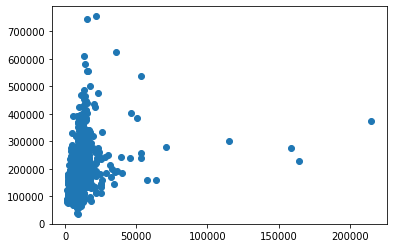

In [89]:
plt.scatter(df_houses_1d.LotArea,df_houses_1d.SalePrice)

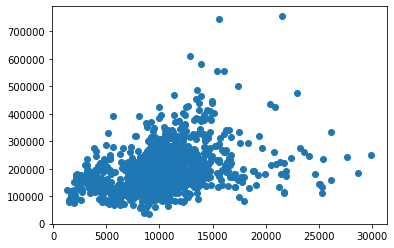

In [90]:
df_houses_1d=df_houses_1d[df_houses_1d.LotArea<30000]
plt.scatter(df_houses_1d.LotArea,df_houses_1d.SalePrice)

In [98]:
x_house=df_houses_1d.LotArea.values.reshape((-1,1))
y_house=df_houses_1d.SalePrice.values.reshape((-1,1))
house_model_1= LinearRegression()
house_model_1.fit(x_house, y_house)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
house_model_1.intercept_

array([110312.94422842])

In [100]:
house_model_1.coef_

array([[7.53441827]])

In [103]:
house_model_1.score(x_house, y_house)

0.14391962020479376

In [108]:
house_price_10k=house_model_1.predict(np.array([[10000]]))
house_price_10k

array([[185657.12693074]])

In [112]:
house_edges=np.array([[0,30000]]).T
house_prices_0_30k=house_model_1.predict(house_edges)
house_prices_0_30k

array([[110312.94422842],
       [336345.49233538]])

(0, 30000)

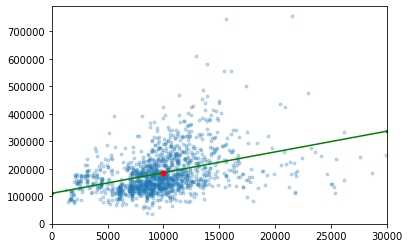

In [116]:
plt.plot(x_house,y_house,'.',alpha=0.25)
plt.plot(house_edges.reshape(-1),house_prices_0_30k.reshape(-1),'g.-',markersize=5)
plt.plot([10000],house_price_10k.reshape(-1),'r.',markersize=10)
plt.xlim(0,30000)
#plt.ylim(0,50)

# Linear Modeling: Multi-Dimensional

In [225]:
x2=20*np.random.random((10000,1))-5
y2=20*np.random.random((10000,1))-10
eps2=30*np.random.randn(10000,1)
z2=2+1.5*x2+4*x2**2-5*y2+eps2

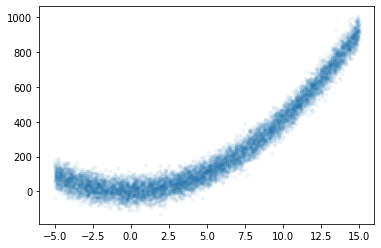

In [226]:
plt.plot(x2,z2,'.',alpha=0.05)

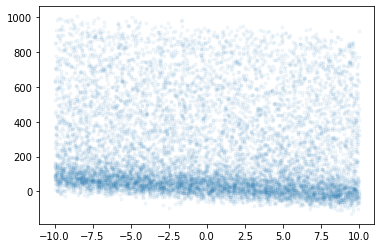

In [227]:
plt.plot(y2,z2,'.',alpha=0.05)

In [228]:
Z2=z2.reshape(-1,1)
X2=np.hstack([x2.reshape(-1,1),y2.reshape(-1,1)])
Z2.shape,X2.shape

((10000, 1), (10000, 2))

In this example we will also split are data into training and validating/testing data.

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
X2_train, X2_test,Z2_train, Z2_test=train_test_split(X2,Z2,test_size=0.2)
X2_train.shape, X2_test.shape,Z2_train.shape, Z2_test.shape

((8000, 2), (2000, 2), (8000, 1), (2000, 1))

In [231]:
model2= LinearRegression()
model2.fit(X2_train, Z2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [232]:
model2.intercept_

array([33.58138829])

In [233]:
model2.coef_

array([[41.72128562, -5.14688366]])

In [234]:
model2.score(X2_train, Z2_train)

0.7952254893428643

In [235]:
model2.score(X2_test, Z2_test)

0.7855031912498758

Next we will demonstrate feature engineering by generating a new feature $x^2$. In this way we can develop a multidimensional and polynomial model using linear methods.

In [242]:
X2_poly=np.hstack([x2.reshape(-1,1),(x2**2).reshape(-1,1),y2.reshape(-1,1)])
X2_poly

array([[  9.22127421,  85.03189813,  -3.58750071],
       [ 11.55241493, 133.45829071,  -8.51931427],
       [  0.7164223 ,   0.5132609 ,   6.98822426],
       ...,
       [  8.55764199,  73.2332364 ,   0.78198644],
       [  9.14331994,  83.60029958,   7.54343229],
       [  7.67572534,  58.91675951,   9.74369707]])

In [244]:
X2_poly_train, X2_poly_test,Z2_poly_train, Z2_poly_test=train_test_split(X2_poly,Z2,test_size=0.2)
X2_poly_train.shape, X2_poly_test.shape,Z2_train.shape, Z2_test.shape

((8000, 3), (2000, 3), (8000, 1), (2000, 1))

In [247]:
model2_poly= LinearRegression()
model2_poly.fit(X2_poly_train, Z2_poly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [248]:
model2_poly.intercept_

array([2.3507605])

In [249]:
#z2=2+1.5*x2+4*x2**2-5*y2+eps2
model2_poly.coef_

array([[ 1.40490068,  4.00632894, -4.93847992]])

In [271]:
model2_poly.score(X2_poly_train, Z2_poly_train)

0.9877198039973867

In [272]:
model2_poly.score(X2_poly_test, Z2_poly_test)

0.9872233798533082

# Problem 2

- Use the `Ames_Housing_Sales.csv` data in the pandas DataFrame `df_houses`
- Isolate columns `LotArea`,`SalePrice` and `OverallQual` 
- Filter to include only houses below 30000 sqft `LotArea` and assign to in  `df_houses_2d`
- Plot again `OverallQual` vs `SalePrice`
- Fit with a 2d linear model
- Determine the slope and intercept.
- Determine the score of the model.
- Fit with a polynomial model by adding the 3 following features:
    - `OverallQual`x`OverallQual`
    - `OverallQual`x`LotArea`
    - `LotArea`x`LotArea`
- Determine the slope and intercept.
- Determine the score of the model.
- Write an equation for the model.

In [262]:
df_houses_2d=df_houses[['OverallQual','LotArea','SalePrice']][df_houses.LotArea<30000]
df_houses_2d.head()

,OverallQual,LotArea,SalePrice
0,7,8450,208500
1,6,9600,181500
2,7,11250,223500
3,7,9550,140000
4,8,14260,250000


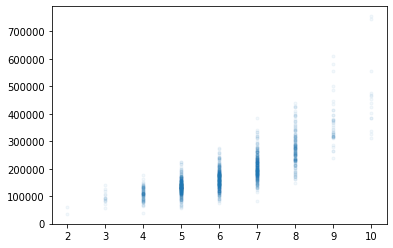

In [261]:
plt.plot(df_houses_2d.OverallQual,df_houses_2d.SalePrice,'.',alpha=0.05)

In [268]:
f1=df_houses_2d.OverallQual.values.reshape(-1,1)
f2=df_houses_2d.LotArea.values.reshape(-1,1)

X3=np.hstack([f1,f2])
Y3=df_houses_2d.SalePrice.values.reshape(-1,1)

In [269]:
X3_train, X3_test,Y3_train, Y3_test=train_test_split(X3,Y3,test_size=0.2)
X3_train.shape, X3_test.shape,Y3_train.shape, Y3_test.shape

((1085, 2), (272, 2), (1085, 1), (272, 1))

In [275]:
model3= LinearRegression()
model3.fit(X3_train, Y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [276]:
model3.intercept_

array([-135961.94120592])

In [277]:
model3.coef_

array([[4.39343207e+04, 4.91642554e+00]])

In [279]:
model3.score(X3_train, Y3_train)

0.6956261428397741

In [280]:
model3.score(X3_test, Y3_test)

0.7114157606049056

In [282]:
f3=f1*f1
f4=f2*f2
f5=f1*f2

X3_poly=np.hstack([f1,f2,f3,f4,f5])

In [283]:
X3_poly_train, X3_poly_test,Y3_train, Y3_test=train_test_split(X3_poly,Y3,test_size=0.2)
X3_poly_train.shape, X3_poly_test.shape,Y3_train.shape, Y3_test.shape

((1085, 5), (272, 5), (1085, 1), (272, 1))

In [284]:
model3_poly= LinearRegression()
model3_poly.fit(X3_poly_train, Y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [285]:
model3_poly.intercept_

array([185710.65070048])

In [286]:
model3_poly.coef_

array([[-4.85278303e+04, -1.92546433e+00,  6.01980258e+03,
        -1.27922051e-04,  1.46737624e+00]])

In [287]:
model3_poly.score(X3_poly_train, Y3_train)

0.7595716288045055

In [289]:
model3_poly.score(X3_poly_test, Y3_test)

0.760260603524292

# Classifiers

## Synthetic Data

We will create a function to generate sythetic data. The function will create a 2D gaussian distribution with an array of associated integer labels.
- `label` is the classification label
- `N` is the number of points
- `xy` is a tuple representing 2D-centroid of the distribution
- `ab` is a tuple with the standard deviations of axes
- `theta` is the angle of rotation

We will use this function for creating data to play with for the task of classification.

In [326]:
def synth_gaussian(label=0,N=100,xy=(0,0),ab=(1,1),theta=0):
    D=2 #dim
    theta=theta*np.pi/180 #angle to radians
    rot_mat=np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]]) #rot matrix
    gauss=np.random.randn(N,D) #create random normal dist
    gauss=gauss*np.array([ab]) #scale dist
    gauss=gauss@rot_mat #rotate dist
    gauss=gauss+np.array([xy]) #translate dist
    return gauss,np.ones(N,dtype=int)*int(label) #return dist with associate labels

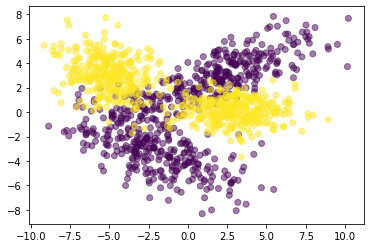

In [345]:
G1,labels1=synth_gaussian(label=0,N=300,xy=(2,3),ab=(3.5,1),theta=30)
G2,labels2=synth_gaussian(label=0,N=300,xy=(-2,-3),ab=(3,1.5),theta=-30)
G3,labels3=synth_gaussian(label=1,N=300,xy=(3,0),ab=(2,1),theta=0)
G4,labels4=synth_gaussian(label=1,N=300,xy=(-5,3),ab=(1.75,1.25),theta=-30)
G=np.vstack([G1,G2,G3,G4])
labels=np.concatenate([labels1,labels2,labels3,labels4])
plt.scatter(G[:,0],G[:,1],c=labels,alpha=0.5)


In [346]:
G_train, G_test,labels_train, labels_test=train_test_split(G,labels,test_size=0.2)
G_train.shape, G_test.shape,labels_train.shape, labels_test.shape

((960, 2), (240, 2), (960,), (240,))

## KNearestNeighbors

In [347]:
from  sklearn.neighbors import KNeighborsClassifier

In [361]:
knn=KNeighborsClassifier(n_neighbors=5)

In [362]:
knn.fit(G_train,labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [363]:
knn.score(G_train,labels_train)

0.9333333333333333

In [364]:
knn.score(G_test,labels_test)

0.9125

In [365]:
knn_labels_pred=knn.predict(G_test)

In [358]:
from sklearn import metrics

print(metrics.classification_report(labels_test, knn_labels_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       122
           1       0.91      0.92      0.91       118

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



## Naive Bayes

In [359]:
from sklearn.naive_bayes import GaussianNB

In [367]:
nb=GaussianNB()
nb.fit(G_train,labels_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [368]:
nb.score(G_train,labels_train)

0.6583333333333333

In [369]:
nb.score(G_test,labels_test)

0.6291666666666667

In [370]:
nb_labels_pred=nb.predict(G_test)

In [372]:
print(metrics.classification_report(labels_test, nb_labels_pred))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       122
           1       0.60      0.76      0.67       118

    accuracy                           0.63       240
   macro avg       0.64      0.63      0.62       240
weighted avg       0.64      0.63      0.62       240



## Logistic Regression

In [373]:
from sklearn.linear_model import LogisticRegression

In [375]:
lr=LogisticRegression()
lr.fit(G_train,labels_train)

/Users/tone/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [378]:
lr.score(G_train,labels_train)

0.49270833333333336

In [379]:
lr.score(G_test,labels_test)

0.5583333333333333

In [380]:
lr_labels_pred=lr.predict(G_test)

In [381]:
print(metrics.classification_report(labels_test, lr_labels_pred))

              precision    recall  f1-score   support

           0       0.57      0.54      0.55       122
           1       0.55      0.58      0.56       118

    accuracy                           0.56       240
   macro avg       0.56      0.56      0.56       240
weighted avg       0.56      0.56      0.56       240



## Binary Decision Tree

In [382]:
from sklearn.tree import DecisionTreeClassifier

In [384]:
G_train.shape

(960, 2)

In [387]:
tr=DecisionTreeClassifier()
tr.fit(G_train,labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [388]:
tr.score(G_train,labels_train)

1.0

In [389]:
tr.score(G_test,labels_test)

0.8916666666666667

In [390]:
tr_labels_pred=tr.predict(G_test)

In [391]:
print(metrics.classification_report(labels_test, tr_labels_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       122
           1       0.87      0.92      0.89       118

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240



## Random Forest

In [392]:
from sklearn.ensemble import RandomForestClassifier

In [393]:
rf=RandomForestClassifier()

In [394]:
rf.fit(G_train,labels_train)

/Users/tone/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [395]:
rf.score(G_train,labels_train)

0.9864583333333333

In [396]:
rf.score(G_test,labels_test)

0.9125

In [397]:
rf_labels_pred=rf.predict(G_test)

In [398]:
print(metrics.classification_report(labels_test,rf_labels_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       122
           1       0.90      0.92      0.91       118

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



## Support Vector Classifier

In [399]:
from sklearn.svm import SVC

In [400]:
svc=SVC()

In [401]:
svc.fit(G_train,labels_train)

/Users/tone/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [402]:
svc.score(G_train,labels_train)

0.9302083333333333

In [403]:
svc.score(G_test,labels_test)

0.9208333333333333

In [404]:
svc_labels_pred=svc.predict(G_test)

In [405]:
print(metrics.classification_report(labels_test,svc_labels_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       122
           1       0.91      0.93      0.92       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240



## Problem 3

- Import the Titanic clean data
- Split the data columns into features and target
- Split the data rows into a test and training set
- Apply each classifier to the dataset as assess its performance